In [2]:
#In this case study, we will continue taking a look at patterns of flight for each of the three birds in our dataset.
#We will group the flight patterns by bird and date, and plot the mean altitude for these groupings.

In [3]:
import pandas as pd
import numpy as np
birddata = pd.read_csv("bird_tracking.csv", index_col=0)
birddata.head()

,altitude,date_time,device_info_serial,direction,latitude,longitude,speed_2d,bird_name
0,71,2013-08-15 00:18:08+00,851,-150.469753,49.419860,2.120733,0.150000,Eric
1,68,2013-08-15 00:48:07+00,851,-136.151141,49.419880,2.120746,2.438360,Eric
2,68,2013-08-15 01:17:58+00,851,160.797477,49.420310,2.120885,0.596657,Eric
3,73,2013-08-15 01:47:51+00,851,32.769360,49.420359,2.120859,0.310161,Eric
4,69,2013-08-15 02:17:42+00,851,45.191230,49.420331,2.120887,0.193132,Eric


In [7]:
# First, use `groupby()` to group the data by "bird_name".
grouped_birds = birddata.groupby("bird_name")

# Now calculate the mean of `speed_2d` using the `mean()` function.
mean_speeds = (grouped_birds.speed_2d).mean()

# Find the mean `altitude` for each bird.
mean_altitudes = (grouped_birds.altitude).mean()

In [8]:
mean_speeds

bird_name
Eric     2.300545
Nico     2.908726
Sanne    2.450434
Name: speed_2d, dtype: float64

In [105]:
mean_altitudes

bird_name
Eric     60.249406
Nico     67.900478
Sanne    29.159922
Name: altitude, dtype: float64

In [67]:
# Convert birddata.date_time to the `pd.datetime` format.
birddata.date_time = pd.to_datetime(birddata.date_time) #Convert argument to datetime.
# Create a new column of day of observation
birddata["date"]= birddata["date_time"].dt.date #dt. date attribute return a numpy array of python datetime.

# Use `groupby()` to group the data by date.
grouped_bydates = birddata.groupby("date") #so groups all data by each day.

# Find the mean `altitude` for each date.
mean_altitudes_perday = grouped_bydates.altitude.mean() #when grouping all data of each day finds mean of altitude specifically
#for all 3 birds combined. TO group date for each bird, add additional column of bird_name in .groupby().
#Did it the long way in "Bird Migration Case Study"

In [49]:
print("Before dt.date: ") 
print(birddata.date_time)
print("After dt.date: ")
print(birddata.date_time.dt.date)

Before dt.date: 
0       2013-08-15 00:18:08+00:00
1       2013-08-15 00:48:07+00:00
2       2013-08-15 01:17:58+00:00
3       2013-08-15 01:47:51+00:00
4       2013-08-15 02:17:42+00:00
                   ...           
61915   2014-04-30 22:00:08+00:00
61916   2014-04-30 22:29:57+00:00
61917   2014-04-30 22:59:52+00:00
61918   2014-04-30 23:29:43+00:00
61919   2014-04-30 23:59:34+00:00
Name: date_time, Length: 61920, dtype: datetime64[ns, UTC]
After dt.date: 
0        2013-08-15
1        2013-08-15
2        2013-08-15
3        2013-08-15
4        2013-08-15
            ...    
61915    2014-04-30
61916    2014-04-30
61917    2014-04-30
61918    2014-04-30
61919    2014-04-30
Name: date_time, Length: 61920, dtype: object


In [53]:
mean_altitudes_perday

date
2013-08-15    134.092000
2013-08-16    134.839506
2013-08-17    147.439024
2013-08-18    129.608163
2013-08-19    180.174797
                 ...    
2014-04-26     15.118012
2014-04-27     23.897297
2014-04-28     37.716867
2014-04-29     19.244792
2014-04-30     13.954545
Name: altitude, Length: 259, dtype: float64

In [57]:
mean_altitudes_perday[20:34]

date
2013-09-04     90.717213
2013-09-05     87.264000
2013-09-06     89.020492
2013-09-07    103.412955
2013-09-08     76.566265
2013-09-09     81.483471
2013-09-10     90.618852
2013-09-11     77.222672
2013-09-12     75.646091
2013-09-13     66.615079
2013-09-14     73.008097
2013-09-15    126.720648
2013-09-16    123.365462
2013-09-17    116.381526
Name: altitude, dtype: float64

In [63]:
# Use `groupby()` to group the data by bird and date.
grouped_birdday = birddata.groupby(["bird_name", "date"])

# Find the mean `altitude` for each bird and date.
mean_altitudes_perday = grouped_birdday.altitude.mean()

In [65]:
mean_altitudes_perday.shape

(770,)

In [66]:
mean_altitudes_perday

bird_name  date      
Eric       2013-08-15     74.988095
           2013-08-16    127.773810
           2013-08-17    125.890244
           2013-08-18    121.353659
           2013-08-19    134.928571
                            ...    
Sanne      2014-04-26     17.116667
           2014-04-27     17.391892
           2014-04-28     58.876712
           2014-04-29     30.530120
           2014-04-30      4.361111
Name: altitude, Length: 770, dtype: float64

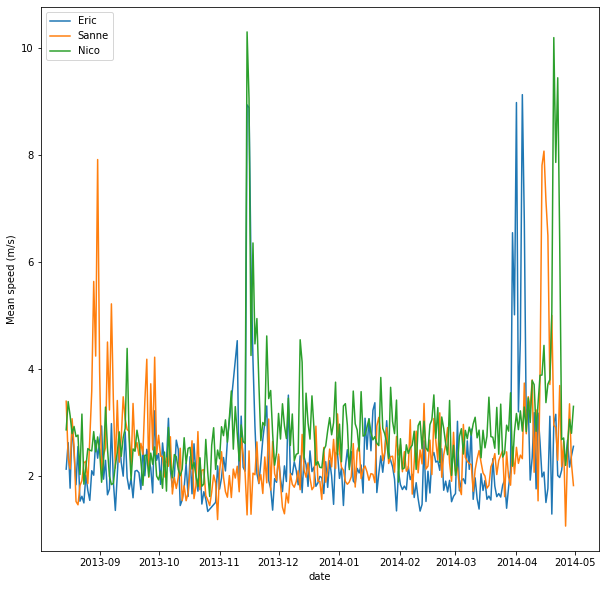

In [107]:
import matplotlib.pyplot as plt

grouped_birdday = birddata.groupby(["bird_name", "date"])

eric_daily_speed  = grouped_birdday.speed_2d.mean()["Eric"]
sanne_daily_speed = grouped_birdday.speed_2d.mean()["Sanne"]
nico_daily_speed  = grouped_birdday.speed_2d.mean()["Nico"]
plt.figure(figsize=(10,10))
eric_daily_speed.plot(label="Eric")
sanne_daily_speed.plot(label="Sanne")
nico_daily_speed.plot(label="Nico")
plt.legend(loc="upper left")
plt.ylabel("Mean speed (m/s)")
plt.show()

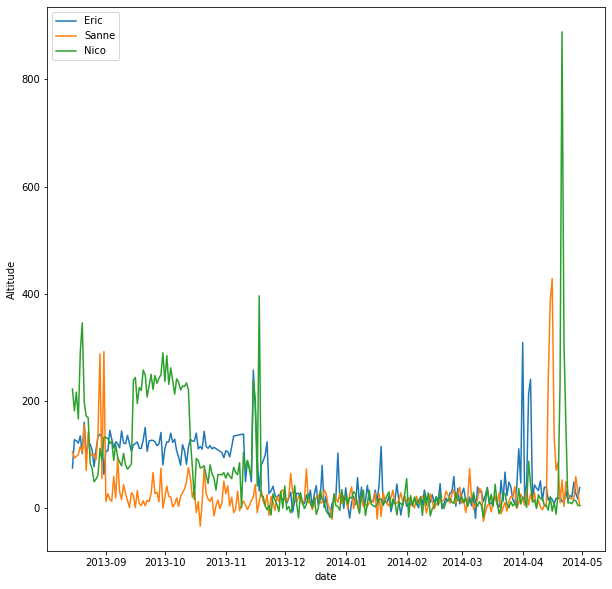

In [103]:
import matplotlib.pyplot as plt

grouped_birdday = birddata.groupby(["bird_name", "date"])

eric_daily_speed  = grouped_birdday.altitude.mean()["Eric"]
sanne_daily_speed = grouped_birdday.altitude.mean()["Sanne"]
nico_daily_speed  = grouped_birdday.altitude.mean()["Nico"]
plt.figure(figsize=(10,10))
eric_daily_speed.plot(label="Eric")
sanne_daily_speed.plot(label="Sanne")
nico_daily_speed.plot(label="Nico")
plt.legend(loc="upper left")
plt.ylabel("Altitude")
plt.show()